<h1 style="margin-bottom: 0px;">BooLEVARD: Boolean Logical Evaluation of Activation and Repression in Directed pathways</h1>
<h5 style="margin-bottom: 2px; margin-top: 0px;">Marco Fariñas<sup>1</sup>, Eirini Tsirvouli<sup>2,3</sup>, John Zobolas<sup>4</sup>, Tero Aittokallio<sup>4,5</sup>, Åsmund Flobak<sup>3,6,7</sup>, Kaisa Lehti<sup>1,8</sup></h5>
<h5 style="margin-top: 3px; margin-bottom: 0px;">doi: </h5>
<p style="font-size:small"> 
    <sup>1</sup>. Department of Biomedical Laboratory Science, Norwegian University of Science and Technology (NTNU), Trondheim, Norway. <br>
    <sup>2</sup>. Department of Biology, Norwegian University of Science and Technology (NTNU), Trondheim, Norway.<br>
    <sup>3</sup>. Department of Clinical and Molecular Medicine, Norwegian University of Science and Technology (NTNU), Trondheim, Norway.<br>
    <sup>4</sup>. Department of Cancer Genomics, Oslo University Hospital (OUH), Oslo, Norway.<br>
    <sup>5</sup>. Institute for Molecular Medicine Finland, University of Helsinki, Helsinki, Finland.<br>
    <sup>6</sup>. The Cancer Clinic, St. Olavs Hospital, Trondheim, Norway.<br>
    <sup>7</sup>. Department of Biotechnology and Nanomedicine, Sintef Industry, Trondheim, Norway.<br>
    <sup>8</sup>. Department of Microbiology, Tumor and Cell Biology, Karolinska Institute (KI), Stockholm, Sweden.<br>
</p>
<h4 style="margin-top: 0px; margin-bottom: 2px; font-size: 1.5em"><b>Use Case 2: Figure and Supplementary Figure source code</b></h4>
<h4 style="margin-top: 25px; margin-bottom: 0px;"><b><i>Outline</i></b></h4>
<h6 style="margin-top: 15px; margin-bottom: 0px; font-size : 1em; line-height: 1.5em">
    <b>0.- Package Load </b><a href="#section-0">[visit]</a><br>
    <b>1.- Functions </b><a href="#section-1">[visit]</a><br>
    <b>2.- Scalability Analysis </b><a href="#section-2">[visit]</a><br>
    2.1.- Random model generation </b><a href="#section-2.1">[visit]</a><br>
    2.2.- Run BooLEVARD: without parallelization </b><a href="#section-2.1">[visit]</a><br>
    2.3.- Run BooLEVARD: with parallelization </b><a href="#section-2.2">[visit]</a><br>

</h6>

<h4 style="margin-top: 0px; margin-bottom: 2px;" id="section-0"><b>0.- Package load</b></h4>

In [ ]:
import random
import numpy as np
from rpy2.robjects import IntVector
from rpy2.robjects.packages import importr
import os
import boolevard as blv
import matplotlib.pyplot as plt
import pandas as pd
import time
import re

boolnet = importr("BoolNet")

<h4 style="margin-top: 0px; margin-bottom: 2px;" id="section-1"><b>1.- Functions</b></h4>

In [2]:
def random_bool_expr(regulators):
    expr_parts = []
    for regulator in regulators:
        literal = f"!{regulator}" if random.random() < 0.5 else regulator
        expr_parts.append(literal)
    while len(expr_parts) > 1:
        idx = random.randint(0, len(expr_parts) - 2)
        operator = random.choice([" & ", " | "])
        combined = f"({expr_parts[idx]}{operator}{expr_parts[idx+1]})"
        expr_parts = expr_parts[:idx] + [combined] + expr_parts[idx+2:]
    return expr_parts[0]

def random_bn(n, k_min, k_max, n_inputs, n_models, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for model_idx in range(1, n_models + 1):
        genes = [f"Gene{i+1}" for i in range(n)]
        input_nodes = set(random.sample(genes, n_inputs))
        rules = []
        total_edges = 0
        for gene in genes:
            if gene in input_nodes:
                rules.append(f"{gene}, {gene}")
                continue
            k = random.randint(k_min, k_max)
            regulators = random.sample([g for g in genes if g != gene], k)
            total_edges += k
            expr = random_bool_expr(regulators)
            rules.append(f"{gene}, {expr}")
        fname = f"randomBN_{n}N{total_edges}E{k_max}KMAX_{model_idx}.bnet"
        fpath = os.path.join(output_dir, fname)
        with open(fpath, "w") as f:
            f.write("\n".join(rules))

        print(f"Saved: {fpath} ({total_edges} edges)")

<h4 style="margin-top: 0px; margin-bottom: 2px;" id="section-1"><b>2.- Scalability Analysis</b></h4><br>
<h5 style="margin-top: 0px; margin-bottom: 2px;"  id="section-2.1"><b>2.1.-</b> Random model generation</h5>

In [4]:
sizes = [20, 30, 40, 50, 60, 70, 80, 90, 100]
max_ks = [2, 3, 4, 5]
for size in sizes:
    for max_k in max_ks:
        random_bn(size, 1, max_k, 3, 20, "random")

Saved: random/randomBN_20N27E2KMAX_1.bnet (27 edges)
Saved: random/randomBN_20N25E2KMAX_2.bnet (25 edges)
Saved: random/randomBN_20N24E2KMAX_3.bnet (24 edges)
Saved: random/randomBN_20N26E2KMAX_4.bnet (26 edges)
Saved: random/randomBN_20N25E2KMAX_5.bnet (25 edges)
Saved: random/randomBN_20N23E2KMAX_6.bnet (23 edges)
Saved: random/randomBN_20N26E2KMAX_7.bnet (26 edges)
Saved: random/randomBN_20N24E2KMAX_8.bnet (24 edges)
Saved: random/randomBN_20N26E2KMAX_9.bnet (26 edges)
Saved: random/randomBN_20N27E2KMAX_10.bnet (27 edges)
Saved: random/randomBN_20N28E2KMAX_11.bnet (28 edges)
Saved: random/randomBN_20N25E2KMAX_12.bnet (25 edges)
Saved: random/randomBN_20N24E2KMAX_13.bnet (24 edges)
Saved: random/randomBN_20N27E2KMAX_14.bnet (27 edges)
Saved: random/randomBN_20N28E2KMAX_15.bnet (28 edges)
Saved: random/randomBN_20N28E2KMAX_16.bnet (28 edges)
Saved: random/randomBN_20N24E2KMAX_17.bnet (24 edges)
Saved: random/randomBN_20N23E2KMAX_18.bnet (23 edges)
Saved: random/randomBN_20N27E2KMAX_19

<h5 style="margin-top: 0px; margin-bottom: 2px;"  id="section-2.2"><b>2.2.-</b> Run BooLEVARD: without parallelization</h5> <br>
<div style="
  border:1px solid #ccc;
  border-radius:6px;
  padding:10px;
  background-color:#f9f9f9;
  font-size:14px;
  overflow-x:auto;
  width:99%;
  border-left:4px solid #007BFF;
">

```python
files = sorted(os.listdir("random"), key=lambda x: [int(n) for n in re.findall(r'\d+', x)])
times, npaths, nss = {}, {}, {}
for f in files:
    m = blv.Load(f"random/{f}")
    if len(m.Info.columns) > 2:
        t0 = time.time()
        npaths[f] = sum(sum(abs(x) for x in ss) for ss in m.CountPaths(m.Nodes, ss_wise = True))
        times[f] = time.time() - t0
        nss[f] = len(m.Info.columns) - 2
```


<h5 style="margin-top: 0px; margin-bottom: 2px;"  id="section-2.2"><b>2.2.-</b> Run BooLEVARD: with parallelization</h5> <br>
<div style="
  border:1px solid #ccc;
  border-radius:6px;
  padding:10px;
  background-color:#f9f9f9;
  font-size:14px;
  overflow-x:auto;
  width:99%;
  border-left:4px solid #007BFF;
">

```python
from mpi4py import MPI
import os, re, time, csv
import boolevard as blv

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

WORK_TAG = 1
STOP_TAG = 0

def process_file(f):
    m = blv.Load(f"random/{f}")
    if len(m.Info.columns) <= 2:
        return None
    t0 = time.time()
    npaths = sum(sum(abs(x) for x in ss) for ss in m.CountPaths(m.Nodes, ss_wise=True))
    return (f, npaths, len(m.Info.columns) - 2, time.time() - t0)

if rank == 0:
    processed = set()
    if os.path.exists("Supplementary Data 1.csv"):
        with open("Supplementary Data 1.csv", newline="") as csvfile:
            reader = csv.reader(csvfile)
            next(reader, None)
            for row in reader:
                processed.add(row[0])
    files = sorted(os.listdir("random"), key=lambda x: [int(n) for n in re.findall(r'\d+', x)])
    files = [f for f in files if f not in processed]
    files_iter = iter(files)
    active_workers = 0
    with open("Supplementary Data 1.csv", "a" if processed else "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        if not processed:
            writer.writerow(["file", "npaths", "nss", "time_s"])
        for worker in range(1, size):
            try:
                f = next(files_iter)
                comm.send(f, dest=worker, tag=WORK_TAG)
                active_workers += 1
            except StopIteration:
                break
        finished_workers = 0
        status = MPI.Status()
        while finished_workers < active_workers:
            result = comm.recv(source=MPI.ANY_SOURCE, tag=MPI.ANY_TAG, status=status)
            worker = status.Get_source()
            if result is not None:
                fname, np, ns, t = result
                writer.writerow([fname, np, ns, t])
                csvfile.flush()
            try:
                f = next(files_iter)
                comm.send(f, dest=worker, tag=WORK_TAG)
            except StopIteration:
                comm.send(None, dest=worker, tag=STOP_TAG)
                finished_workers += 1
else:
    status = MPI.Status()
    while True:
        f = comm.recv(source=0, tag=MPI.ANY_TAG, status=status)
        tag = status.Get_tag()
        if tag == STOP_TAG or f is None:
            break
        result = process_file(f)
        comm.send(result, dest=0)

<h4 style="margin-top: 0px; margin-bottom: 2px;" id="section-1"><b>3.- Figure 4:</b> Scalability Results</h4><br>

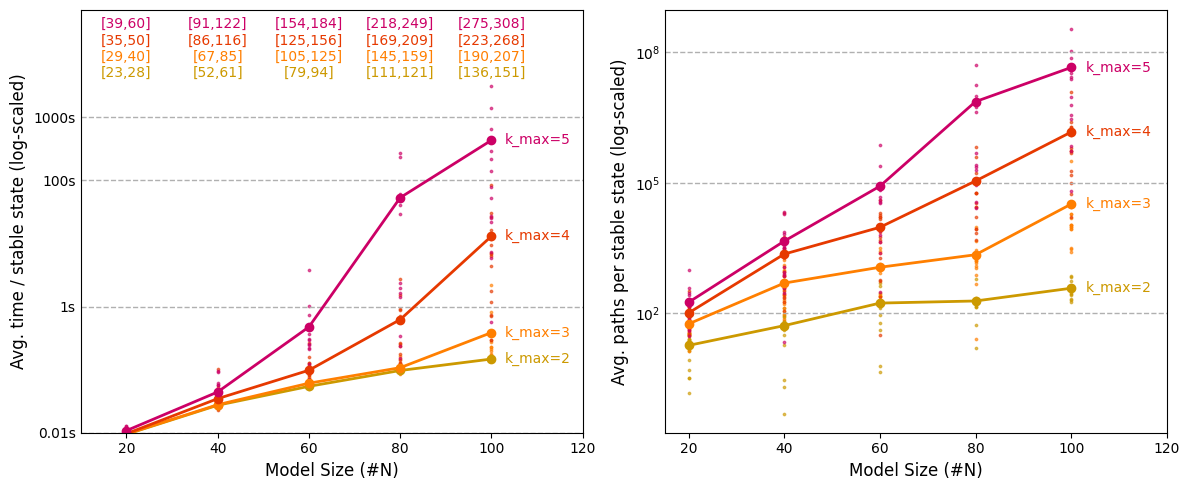

In [ ]:
sc = pd.read_csv("Tables/Supplementary Data 1.csv")
sc[["nodes","edges","k_max"]] = sc["file"].str.extract(r"(\d+)N(\d+)E(\d+)KMAX").astype(int)
sc["t_ss"] = sc["time_s"]/sc["nss"]
sc["p_ss"] = sc["npaths"]/sc["nss"]
g1 = sc.groupby(["nodes","k_max"])["t_ss"].mean().unstack("k_max")
g2 = sc.groupby(["nodes","k_max"])["p_ss"].mean().unstack("k_max")
colors = {2:"#CC9900",3:"#FF7F00",4:"#E63900",5:"#CC0066"}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
for k in g1.columns:
    xs, ys = g1.index, g1[k]
    ax1.plot(xs, ys, marker="o", color=colors[k], linewidth=2)
    ax1.text(xs[-1]+3, ys.iloc[-1], f"k_max={k}", va="center", color=colors[k])
for k in colors:
    dfk = sc[sc["k_max"]==k]
    ax1.scatter(dfk["nodes"], dfk["t_ss"], s=3, alpha=0.6, color=colors[k])
base_ys = [30000, 16000, 9000, 5000]
ks_desc = sorted(colors.keys(), reverse=True)
for x in g1.index:
    for y, k in zip(base_ys, ks_desc):
        dfkx = sc[(sc["nodes"]==x)&(sc["k_max"]==k)]
        mn, mx = dfkx["edges"].min(), dfkx["edges"].max()
        ax1.text(x, y, f"[{mn},{mx}]", ha="center", va="center", fontsize=10, color=colors[k])
ax1.set_xlim(10, 120)
ax1.set_ylim(0.01, 50000)
ax1.set_xlabel("Model Size (#N)", fontsize=12)
ax1.set_yscale("log")
ticks = [0.01, 1, 100, 1000]
ax1.set_yticks(ticks)
ax1.set_yticklabels([f"{s}s" for s in ticks])
ax1.set_ylabel("Avg. time / stable state (log-scaled)", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=1, linewidth=1)
ax1.tick_params(axis="y", which="both", length=0)

for k in g2.columns:
    xs, ys = g2.index, g2[k]
    ax2.plot(xs, ys, marker="o", color=colors[k], linewidth=2)
    ax2.text(xs[-1]+3, ys.iloc[-1], f"k_max={k}", va="center", color=colors[k])
for k in colors:
    dfk = sc[sc["k_max"]==k]
    ax2.scatter(dfk["nodes"], dfk["p_ss"], s=3, alpha=0.6, color=colors[k])
ax2.set_xlim(15, 120)
ax2.set_xlabel("Model Size (#N)", fontsize=12)
ax2.set_yscale("log")
ax2.set_ylabel("Avg. paths per stable state (log-scaled)", fontsize=12)
ax2.yaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax2.grid(axis="y", which="major", linestyle="--", alpha=1, linewidth=1)
ax2.tick_params(axis="y", which="both", length=0)

plt.tight_layout()
plt.show()
fig.savefig("Figures/png/Figure_4.png", dpi=300, bbox_inches="tight")
fig.savefig("Figures/pdf/Figure_4.pdf", dpi=300, bbox_inches="tight")

<p>
    <b>Figure 4: A. </b>Log-scaled marker-line chart of BooLEVARD's average simulation time per stable state for path enumeration in random Boolean networks of size N = 20, 40, 60, 80, and 100 nodes with a discrete uniform in-degree distribution from 1 to k = 2 (pink), 3 (red), 4 (orange), and 5 (yellow). Individual models are overlaid as smaller scatter points. Above each data point, the [min, max] range of edges for the network configuration is annotated in the corresponding color group.<b> B. </b> Log-scaled marker-line chart of BooLEVARD's average path enumeration per stable state in random Boolean networks of size N = 20, 40, 60, 80, and 100 nodes with a discrete uniform in-degree distribution from 1 to k = 2 (pink), 3 (red), 4 (orange), and 5 (yellow). Individual models are overlaid as smaller scatter points. 
</p>   